In [77]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras
import random
from tensorflow.keras import layers, Input
from sklearn.metrics import mean_absolute_error

In [78]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [79]:
X_train = np.expand_dims(X_train, axis=-1)
X_train = tf.image.resize(X_train, [4, 4])

In [80]:
X_test = np.expand_dims(X_test, axis=-1)
X_test = tf.image.resize(X_test, [4, 4])

In [81]:
X_train = X_train.numpy()
X_test = X_test.numpy()

In [82]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])

In [83]:
X_train.shape

(60000, 4, 4)

In [84]:
for i in range(X_train.shape[0]):
    for j in range(X_train.shape[1]):
        for k in range(X_train.shape[2]):
            if X_train[i, j, k] >= 127.5:
                X_train[i, j, k] = 0
            else:
                X_train[i, j, k] = 255

In [85]:
for i in range(X_test.shape[0]):
    for j in range(X_test.shape[1]):
        for k in range(X_test.shape[2]):
            if X_test[i, j, k] >= 127.5:
                X_test[i, j, k] = 0
            else:
                X_test[i, j, k] = 255

In [86]:
X_train.shape

(60000, 4, 4)

In [87]:
y_train.shape

(60000,)

In [88]:
print('Avant normalisation : Minimum = '+str(X_train.min())+', Maximum = '+str(X_train.max()))

X_max = X_train.max()
X_train  = X_train / X_max
X_test = X_test / X_max

print('Après normalisation : Minimum = '+str(X_train.min())+', Maximum = '+str(X_train.max()))

Avant normalisation : Minimum = 0.0, Maximum = 255.0
Après normalisation : Minimum = 0.0, Maximum = 1.0


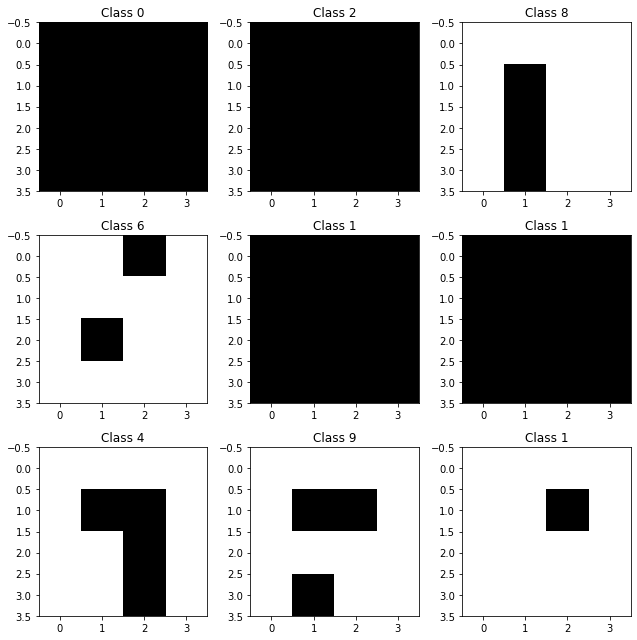

In [89]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [90]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

In [91]:
X_train = X_train.astype('uint8')

In [92]:
X_train

array([[1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1]], dtype=uint8)

In [93]:
y_train = y_train.reshape(y_train.shape[0], 1)

In [94]:
y_test = y_test.reshape(y_test.shape[0], 1)

In [95]:
y_train

array([[5],
       [0],
       [4],
       ...,
       [5],
       [6],
       [8]], dtype=uint8)

In [99]:
for i in range(7, 50, 1):

    model = keras.Sequential()

    model.add(Input(shape=(16,)))

    model.add(layers.Dense(16, activation="relu")),

    model.add(layers.Dense(16, activation="relu")),

    model.add(layers.Dense(16, activation="relu")),

    model.add(layers.Dense(1))
    
    print("modèle déclaré !")
    
    model.compile(
        optimizer='adam',
        loss="mae",
        metrics=[tf.keras.metrics.MeanAbsoluteError()]
    )

    print("modèle compilé !")
    
    my_callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=20, verbose=1),
        tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=10, min_lr=0.00001, verbose=1),
        tf.keras.callbacks.ModelCheckpoint('model-mnist.h5', verbose=0, save_best_only=True, save_weights_only=True)
    ]
    
    print("callbacks ok !")

    history = model.fit(
        x=X_train, 
        y=y_train,
        batch_size=i,
        epochs = 30,
        validation_data=(X_test, y_test),
        callbacks=my_callbacks,
        verbose=0
    )
    
    print("model fit ok !")
    
    y_pred = model.predict(X_test)
    val_mae = mean_absolute_error(y_pred, y_test)
    print("batch_size = "+str(i)+"Validation MAE for Model: {}".format(val_mae))



modèle déclaré !
modèle compilé !
callbacks ok !
model fit ok !
batch_size = 7Validation MAE for Model: 1.9278135299682617
modèle déclaré !
modèle compilé !
callbacks ok !
model fit ok !
batch_size = 8Validation MAE for Model: 1.9324547052383423
modèle déclaré !
modèle compilé !
callbacks ok !
model fit ok !
batch_size = 9Validation MAE for Model: 1.9352492094039917
modèle déclaré !
modèle compilé !
callbacks ok !
model fit ok !
batch_size = 10Validation MAE for Model: 1.937224268913269
modèle déclaré !
modèle compilé !
callbacks ok !
model fit ok !
batch_size = 11Validation MAE for Model: 1.967024803161621
modèle déclaré !
modèle compilé !
callbacks ok !
model fit ok !
batch_size = 12Validation MAE for Model: 1.9433943033218384
modèle déclaré !
modèle compilé !
callbacks ok !
model fit ok !
batch_size = 13Validation MAE for Model: 1.9483433961868286
modèle déclaré !
modèle compilé !
callbacks ok !
model fit ok !
batch_size = 14Validation MAE for Model: 1.9400328397750854
modèle déclar

KeyboardInterrupt: 

In [60]:
y_pred = model.predict(X_test)

In [61]:
X_train.shape

(60000, 49)

In [62]:
X_test.shape

(10000, 49)

In [63]:
y_test = y_test.reshape(y_test.shape[0], 1)

In [64]:
y_test.shape

(10000, 1)

In [65]:
y_pred.shape

(10000, 1)

In [66]:
for i in range(y_pred.shape[0]):
    y_pred[i, 0] = round(y_pred[i, 0])

In [67]:
y_pred[:10]

array([[7.],
       [1.],
       [1.],
       [0.],
       [6.],
       [1.],
       [3.],
       [9.],
       [6.],
       [9.]], dtype=float32)

In [68]:
int(y_pred[6, 0])

3

In [69]:
y_test[0:10]

array([[7],
       [2],
       [1],
       [0],
       [4],
       [1],
       [4],
       [9],
       [5],
       [9]], dtype=uint8)

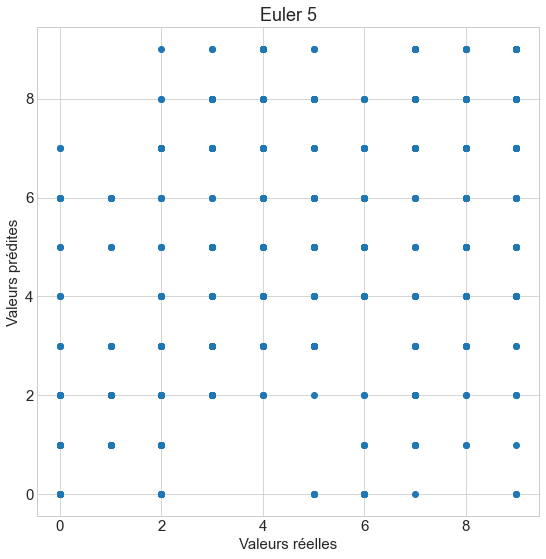

In [128]:
axe = plt.axes()
plt.rcParams.update({'font.size':15})
plt.style.use('seaborn-whitegrid')
plt.scatter(y_test, y_pred)
plt.title('Euler ' + str(i+1))
axe.set(xlabel="Valeurs réelles", ylabel="Valeurs prédites")
plt.show()